In [4]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [5]:
#download dataaset
train=datasets.MNIST('',train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test=datasets.MNIST('',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:04, 2422428.11it/s]                             


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


32768it [00:00, 270755.92it/s]                           
0it [00:00, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


1654784it [00:00, 1955230.41it/s]                            
8192it [00:00, 109059.49it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw
Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [6]:
#prepare dataset
trainset=torch.utils.data.DataLoader(train,batch_size=32,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=32,shuffle=True)

In [62]:
#build simple network.
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # for layer whose weight changes
        self.fc1=nn.Linear(28*28,128,bias=True)
        self.fc2=nn.Linear(128,10)
    # forward function    
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return  F.log_softmax(x,dim=1)
        

In [63]:
#initialize network
net=Net()
# set loss & optimizer
Epochs1=10
loss_function=nn.CrossEntropyLoss()
optimizer1=optim.SGD(net.parameters(),lr=.001)
# build dic to record loss and accuracy
losses1=[]
accuracy1=[]
# train data
for epoch in range(Epochs1):
    correct=0
    total=0
    loss_sum=0
    for data in trainset:
        X,y=data
        net.zero_grad()
        output=net(X.view(-1,28*28))
        Loss1=loss_function(output,y)
        Loss1.backward()
        optimizer1.step()
        loss_sum+=Loss1
        #calculate accuracy
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
    accu=round(correct/total,3)
    print(accu)
    print(loss_sum)
    losses1.append(loss_sum)
    accuracy1.append(accu)

0.418
tensor(3993.3123, grad_fn=<AddBackward0>)
0.734
tensor(3018.3457, grad_fn=<AddBackward0>)
0.798
tensor(2050.4531, grad_fn=<AddBackward0>)
0.832
tensor(1513.2010, grad_fn=<AddBackward0>)
0.849
tensor(1238.9998, grad_fn=<AddBackward0>)
0.862
tensor(1080.0630, grad_fn=<AddBackward0>)
0.87
tensor(976.9901, grad_fn=<AddBackward0>)
0.877
tensor(905.0201, grad_fn=<AddBackward0>)
0.882
tensor(851.8831, grad_fn=<AddBackward0>)
0.885
tensor(811.2509, grad_fn=<AddBackward0>)


In [108]:
# define how to plot loss/accuracy 
def plot_obj(loss,accu,name):
    fig1, axes=plt.subplots(2,1,figsize=(15,9))
    axes[0].plot(loss,'g')
    axes[1].plot(accu,'r')
    plt.show()
    fig1.savefig(str(name)+'.jpg')
    

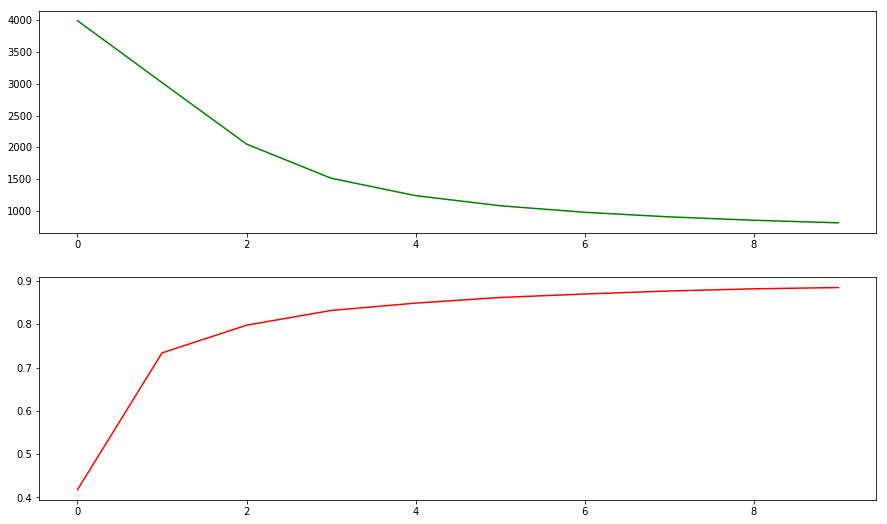

In [103]:
plot_obj(losses1,accuracy1,'mnist_fc')

# save model
torch.save(net.state_dict(), '5525_HW3/mnist-fc')

In [74]:
#load model
net1 = Net()
net1.load_state_dict(torch.load('5525_HW3/mnist-fc'))
net1.eval()
# See performace
correct=0
total=0

with torch.no_grad():
    for data in testset:
        X,y=data
        output=net1(X.view(-1,28*28))
        for idx,i in enumerate(output):
            #print(idx,i)
            #print(torch.argmax(i),y[idx])
            if torch.argmax(i)== y[idx]:
                correct+=1
            total+=1
    accu=round(correct/total,3)
print(accu)
         

0.892


In [75]:
# define covnet class
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(1,20,kernel_size=3,stride=1),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.ReLU())
        self.fc1=nn.Sequential(nn.Linear(13*13*20,128,bias=True),
                               nn.ReLU())
                        
        self.fc2=nn.Linear(128,10)
        
    def forward(self,x):
        out=self.layer1(x)
        #flatten
        out=out.view(-1,13*13*20)
        out=self.fc1(out)
        out=self.fc2(out)
        out=F.softmax(out,dim=1)
        return out
                
            

    

In [78]:
#initialize model
convnet=ConvNet()
#Loss and optimizer for convnet
Loss=nn.CrossEntropyLoss()
optimizer=optim.SGD(convnet.parameters(),lr=0.001)

#train the model
Epochs_c=10
loss_sum=[]
accuracy_c=[]
for epoch in range(Epochs_c):
    correct=0
    total=0
    loss_s=0
    for data in trainset:  
        X,y=data
        #forward pass
        output=convnet(X)
        loss_c=Loss(output,y)
        #backward optimize
        optimizer.zero_grad()
        loss_c.backward()
        optimizer.step()
        # caculate accuracy
        loss_s+=loss_c
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total +=1
    accu_c=round(correct/total,3)
    accuracy_c.append(accu_c)
    loss_sum.append(loss_s)
    print(loss_sum)
    print(accu_c)
   


[tensor(4312.3618, grad_fn=<AddBackward0>)]
0.125
[tensor(4312.3618, grad_fn=<AddBackward0>), tensor(4302.4419, grad_fn=<AddBackward0>)]
0.258
[tensor(4312.3618, grad_fn=<AddBackward0>), tensor(4302.4419, grad_fn=<AddBackward0>), tensor(4288.8984, grad_fn=<AddBackward0>)]
0.443
[tensor(4312.3618, grad_fn=<AddBackward0>), tensor(4302.4419, grad_fn=<AddBackward0>), tensor(4288.8984, grad_fn=<AddBackward0>), tensor(4266.5039, grad_fn=<AddBackward0>)]
0.511
[tensor(4312.3618, grad_fn=<AddBackward0>), tensor(4302.4419, grad_fn=<AddBackward0>), tensor(4288.8984, grad_fn=<AddBackward0>), tensor(4266.5039, grad_fn=<AddBackward0>), tensor(4213.2578, grad_fn=<AddBackward0>)]
0.389
[tensor(4312.3618, grad_fn=<AddBackward0>), tensor(4302.4419, grad_fn=<AddBackward0>), tensor(4288.8984, grad_fn=<AddBackward0>), tensor(4266.5039, grad_fn=<AddBackward0>), tensor(4213.2578, grad_fn=<AddBackward0>), tensor(4097.8071, grad_fn=<AddBackward0>)]
0.351
[tensor(4312.3618, grad_fn=<AddBackward0>), tensor(4302

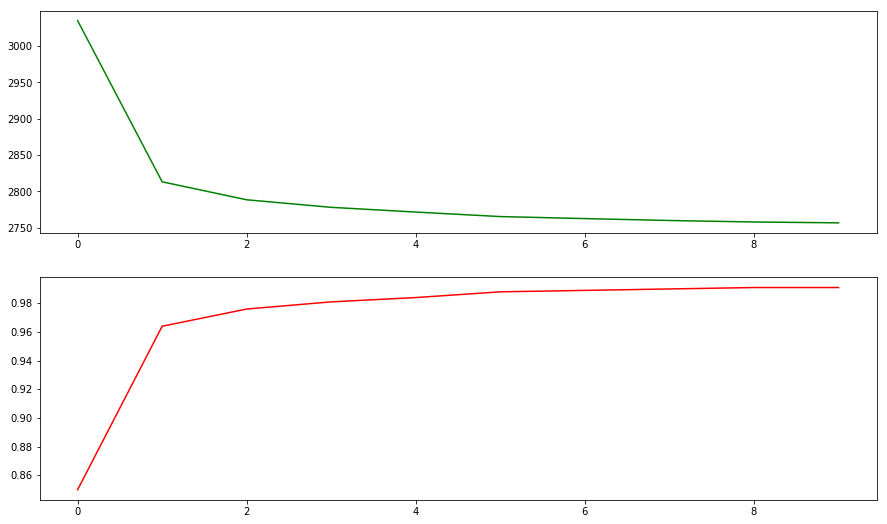

In [109]:
# save model
torch.save(convnet.state_dict(), '5525_HW3/mnist-cnn')
#plot loss and accuracy
plot_obj(loss_sum,accuracy_c,'mnist_cnn')


In [87]:
#load model
convnet1 =ConvNet()
convnet1.load_state_dict(torch.load('/Users/yangxiaomin/Documents/courses/csci 5525/5525_HW3/mnist-cnn'))

#test performance

correct=0
total=0

with torch.no_grad():
    for data in testset:
        X,y=data
        output=convnet1(X.view(-1,1,28,28))
        for idx, i in enumerate(output):
            if torch.argmax(i)== y[idx]:
                correct+=1
            total+=1
    accu=round(correct/total,3)
print(accu)

0.797


In [81]:

trainset2=torch.utils.data.DataLoader(train,batch_size=64,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=32,shuffle=True)

In [53]:
import timeit
t=[32,64,96,128]
start = timeit.default_timer()
loss_d=100
loss0=0
convnet2=ConvNet()
optimizer=optim.SGD(convnet2.parameters(),lr=0.001)
while loss_d>5:
    loss_e=[]
    for data in trainset2:
        X,y=data
        #forward pass
        output=convnet2(X)
        loss_c=Loss(output,y)
        #backward optimize
        optimizer.zero_grad()
        loss_c.backward()
        optimizer.step()
        loss_e.append(loss_c)
    loss1=sum(loss_e)
    loss_d=abs(loss1-loss0)
    loss0=loss1
    print(loss1)
end=timeit.default_timer()
print(loss_d)
print(end-start)


tensor(2158.4580, grad_fn=<AddBackward0>)
tensor(2155.7627, grad_fn=<AddBackward0>)
tensor(2.6953, grad_fn=<AbsBackward>)
39.52334014100052


In [105]:
# 5 

# using adam
#initialize model
convnet=ConvNet()
#Loss and optimizer for convnet
Loss=nn.CrossEntropyLoss()
optimizer=optim.Adam(convnet.parameters(),lr=0.001)

#train the model
Epochs_c=10
loss_sum=[]
accuracy_c=[]
for epoch in range(Epochs_c):
    correct=0
    total=0
    loss_s=0
    for data in trainset:  
        X,y=data
        #forward pass
        output=convnet(X)
        loss_c=Loss(output,y)
        #backward optimize
        optimizer.zero_grad()
        loss_c.backward()
        optimizer.step()
        # caculate accuracy
        loss_s+=loss_c
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total +=1
    accu_c=round(correct/total,3)
    accuracy_c.append(accu_c)
    loss_sum.append(loss_s)
    print(loss_sum)
    print(accu_c)
plt(loss_sum,accuracy_c,'mnist-cnn-adam')



KeyboardInterrupt: 

In [107]:
# using adagrad
#initialize model
convnet=ConvNet()
#Loss and optimizer for convnet
Loss=nn.CrossEntropyLoss()
optimizer=optim.Adam(convnet.parameters(),lr=0.001)

#train the model
Epochs_c=10
loss_sum=[]
accuracy_c=[]
for epoch in range(Epochs_c):
    correct=0
    total=0
    loss_s=0
    for data in trainset:  
        X,y=data
        #forward pass
        output=convnet(X)
        loss_c=Loss(output,y)
        #backward optimize
        optimizer.zero_grad()
        loss_c.backward()
        optimizer.step()
        # caculate accuracy
        loss_s+=loss_c
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total +=1
    accu_c=round(correct/total,3)
    accuracy_c.append(accu_c)
    loss_sum.append(loss_s)
    print(loss_sum)
    print(accu_c)
plt(loss_sum,accuracy_c,'mnist-cnn-adam')


[tensor(3034.8394, grad_fn=<AddBackward0>)]
0.85
[tensor(3034.8394, grad_fn=<AddBackward0>), tensor(2813.2537, grad_fn=<AddBackward0>)]
0.964
[tensor(3034.8394, grad_fn=<AddBackward0>), tensor(2813.2537, grad_fn=<AddBackward0>), tensor(2788.5308, grad_fn=<AddBackward0>)]
0.976
[tensor(3034.8394, grad_fn=<AddBackward0>), tensor(2813.2537, grad_fn=<AddBackward0>), tensor(2788.5308, grad_fn=<AddBackward0>), tensor(2778.1465, grad_fn=<AddBackward0>)]
0.981
[tensor(3034.8394, grad_fn=<AddBackward0>), tensor(2813.2537, grad_fn=<AddBackward0>), tensor(2788.5308, grad_fn=<AddBackward0>), tensor(2778.1465, grad_fn=<AddBackward0>), tensor(2771.6587, grad_fn=<AddBackward0>)]
0.984
[tensor(3034.8394, grad_fn=<AddBackward0>), tensor(2813.2537, grad_fn=<AddBackward0>), tensor(2788.5308, grad_fn=<AddBackward0>), tensor(2778.1465, grad_fn=<AddBackward0>), tensor(2771.6587, grad_fn=<AddBackward0>), tensor(2765.4565, grad_fn=<AddBackward0>)]
0.988
[tensor(3034.8394, grad_fn=<AddBackward0>), tensor(2813.

TypeError: 'module' object is not callable

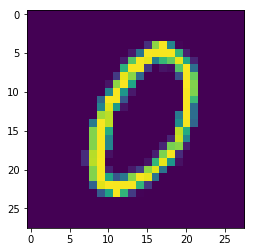

In [26]:
# plot
plt.imshow(data[0][0].view(28,28))
plt.show()

In [27]:
import os

In [33]:
os.getcwd()

'/Users/yangxiaomin/Documents/courses/csci 5525'